# Homework 3: This HW is based on the code for week 6 (Gradient Descent).

## Instructions: 

Place the answer to your code only in the area specified. Also, make sure to run all your code (e.g., if you are running the code on your local machine, press >> to "Restart Kernel and Run All Cells"). This should plot all outputs including your answers to homework questions. After this, go to file (top left) and select "Print". Save your file as a PDF and upload the PDF to Canvas. This is one way to generate a PDF. You can also search for other methods to generate a PDF from Jupyter.

# Question:

Try to a build a simple optimizer to minimize:

    f(w) = a[0] + a[1]*w + a[2]*w^2 + ... + a[d]*w^d
    
for the coefficients `a = [0,0.5,-2,0,1]`.

* Plot the function f(w) (1 point)
* Can you see where the minima is? (1 point)
* Write a function that outputs f(w) and its gradient (2 points).
* Run the optimizer on the function to see if it finds the minima (2 points).
* Print the function value and number of iterations (2 points).
* Instead of writing the function for a specific coefficient vector `a`, create a class that works for an arbitrary vector `a` (2 points).

You may wish to use the `poly.polyval(w,a)` method to evaluate the polynomial.

Minimum value was found to be f(-1.056) = -1.515 in 73 iterations
Initial value was f(-0.582) = -0.853


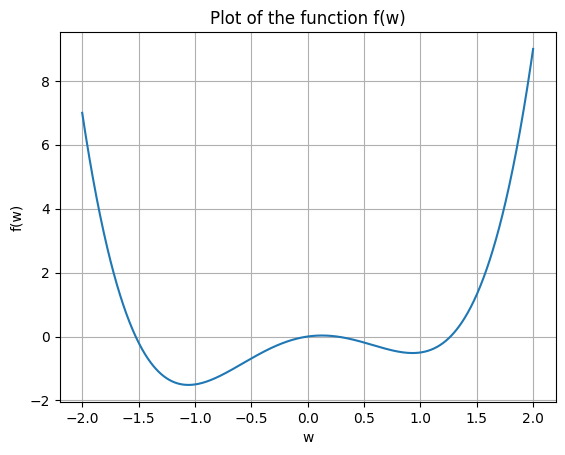

In [46]:
import numpy as np
import matplotlib.pyplot as plt
import numpy.polynomial.polynomial as poly
import random
%matplotlib inline

class PolynomialOptimizer:
    def __init__(self, a):
        self.a = np.array(a)

    def f(self, w):
        return poly.polyval(w, self.a)
    
    def grad(self, w):
        gradArr = np.zeros_like(self.a)
        gradArr[0] = 0
        for i in range(1, len(self.a)):
            gradArr[i] = self.a[i] * i * (w**(i - 1))
        return np.sum(gradArr)
    
    def optimize(self, w, learnRate=0.01, tolerance=1e-6, iterations=1000):
        for i in range(iterations):
            newW = w - learnRate * self.grad(w)
            if np.abs(self.f(newW) - self.f(w)) < tolerance:
                break
            w = newW
        return w, self.f(w), i+1

a = [0, 0.5, -2, 0, 1]

# Plot the function
wVal = np.linspace(-2, 2, 1000)
fVal = poly.polyval(wVal, a)
plt.plot(wVal, fVal)
plt.xlabel('w')
plt.ylabel('f(w)')
plt.title('Plot of the function f(w)')
plt.grid()

opt = PolynomialOptimizer(a)
initial = random.uniform(-2, 2)
minW, minF, iterations = opt.optimize(initial)
print(f"Minimum value was found to be f({minW:.3f}) = {minF:.3f} in {iterations} iterations")
print(f"Initial value was f({initial:.3f}) = {poly.polyval(initial, a):.3f}")


We can see with multiple runs that the code can't find the global minimum if it starts anywhere to the right of around w = 0.2, as the gradient function will find the local minimum that is at f(0.93) -0.517. However, if the random number is anywhere to the left of w = 0.2, it will find the global minimum at f(-1.06) = -1.52